In [1]:
import pandas as pd

home = pd.read_csv('California_housing.csv')
home = home.dropna()
home = home.reset_index(drop=True)
home['rooms_per_household'] = (home['total_rooms']/home['households'])
home['bedrooms_per_household'] = (home['total_bedrooms']/home['households'])

In [2]:
# Check table dimension
print("The dimension of the table is: ", home.shape)

# View data head
print("")
print(home.head(5))

The dimension of the table is:  (20433, 12)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   rooms_per_household 

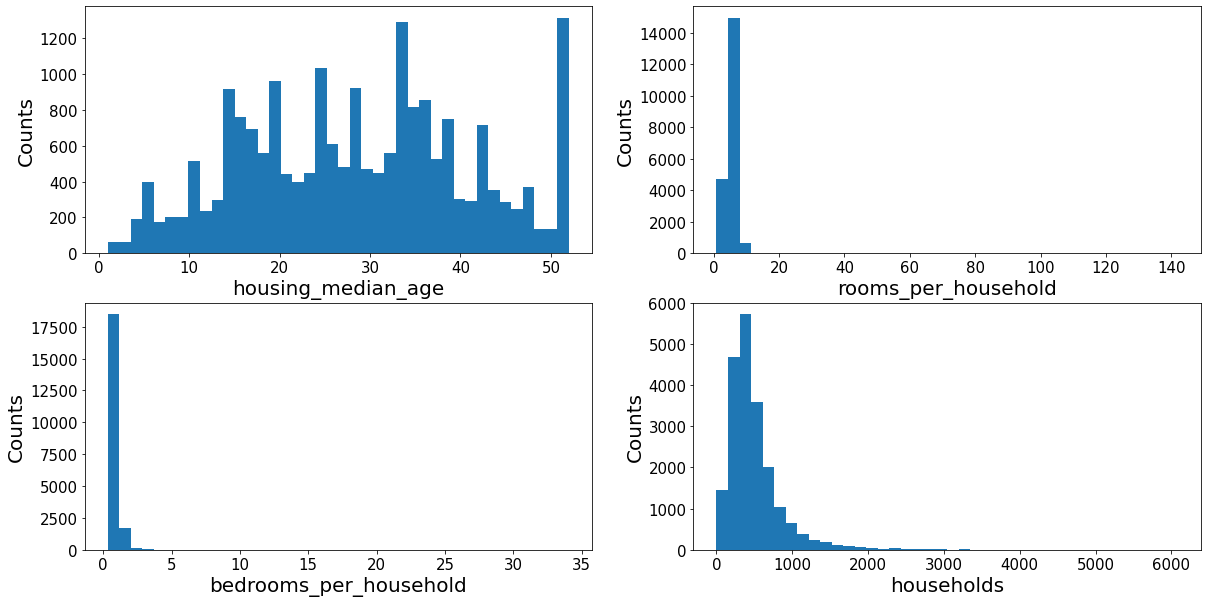

In [3]:
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['housing_median_age', 'rooms_per_household', 'bedrooms_per_household', 'households']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(home[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

,housing_median_age,rooms_per_household,bedrooms_per_household,households
0,41.0,6.984127,1.023810,126.0
1,21.0,6.238137,0.971880,1138.0
2,52.0,8.288136,1.073446,177.0
3,52.0,5.817352,1.073059,219.0
4,52.0,6.281853,1.081081,259.0
...,...,...,...,...
20428,25.0,5.045455,1.133333,330.0
20429,18.0,6.114035,1.315789,114.0
20430,17.0,5.205543,1.120092,433.0
20431,18.0,5.329513,1.171920,349.0


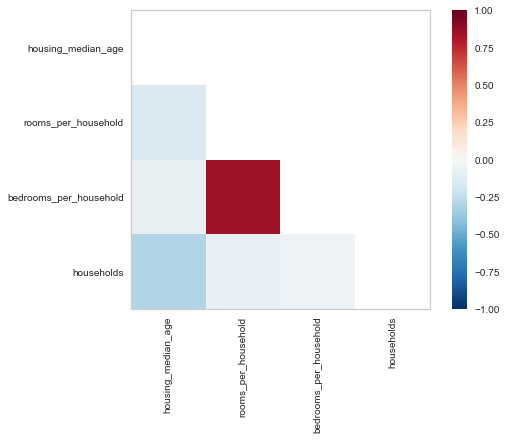

In [4]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = home[num_features]

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#plt.show()

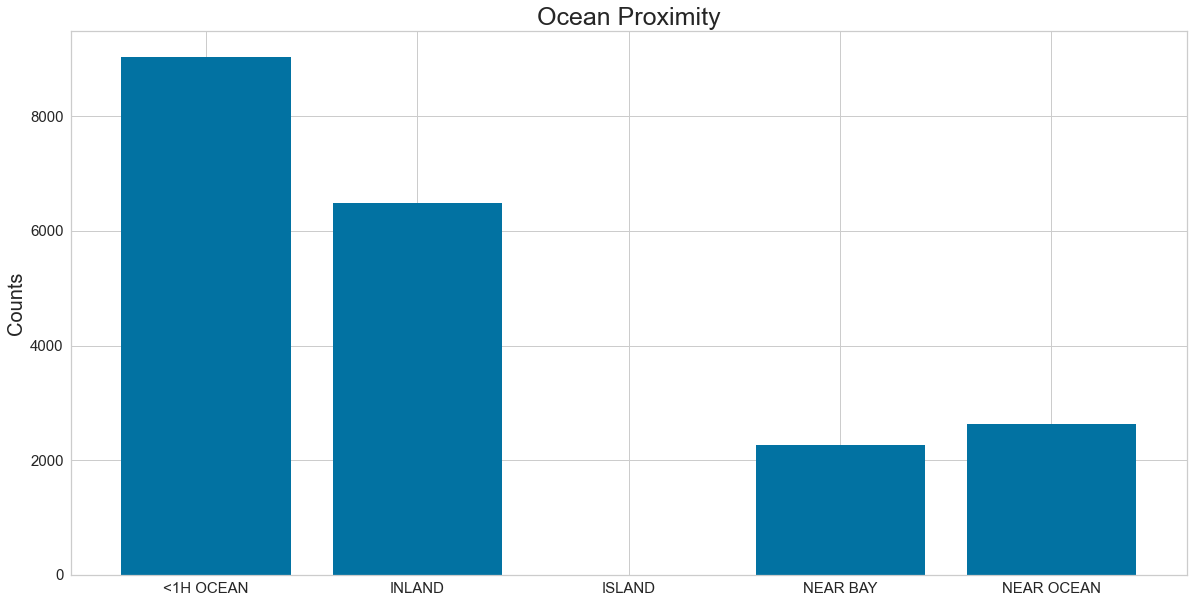

In [5]:
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 1)

# make the data read to feed into the visulizer
X_Survived = home.replace({'ocean_proximity': {1: 'NEAR BAY', 0: 'INLAND'}}).groupby('ocean_proximity').size().reset_index(name='Counts')['ocean_proximity']
Y_Survived = home.replace({'ocean_proximity': {1: 'NEAR BAY', 0: 'INLAND'}}).groupby('ocean_proximity').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes.bar(X_Survived, Y_Survived)
axes.set_title('Ocean Proximity', fontsize=25)
axes.set_ylabel('Counts', fontsize=20)
axes.tick_params(axis='both', labelsize=15)

#plt.show()

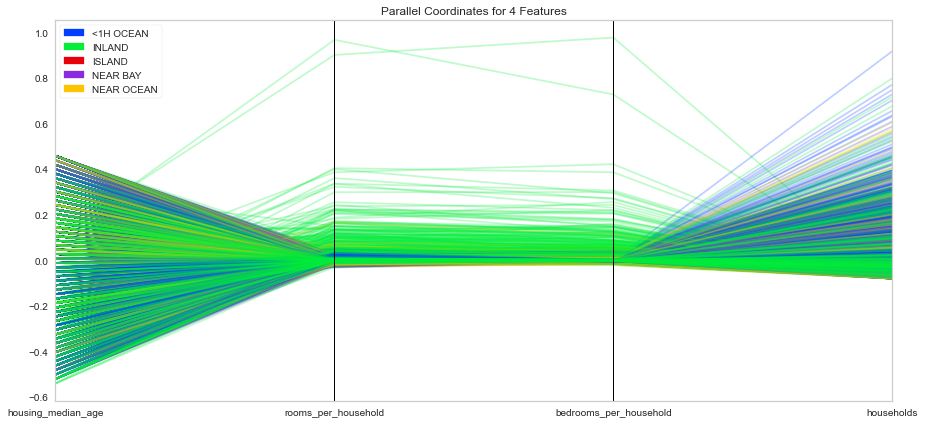

In [6]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
num_features = ['housing_median_age', 'rooms_per_household', 'bedrooms_per_household', 'households']

# copy data to a new dataframe
home_norm = home.copy()
# normalize data to 0-1 range
for feature in num_features:
    home_norm[feature] = (home[feature] - home[feature].mean(skipna=True)) / (home[feature].max(skipna=True) - home[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = home_norm[num_features].values
y = home.ocean_proximity.values

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof() # Draw/show/poof the data
plt.show();

In [7]:
#fill the missing age data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(home['housing_median_age'])

# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

fill_na_most(home['households'])

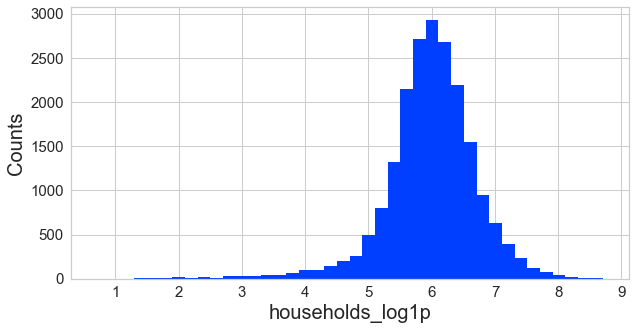

In [8]:
# import package
import numpy as np

# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

home['households_log1p'] = log_transformation(home['households'])

#check the distribution using histogram
# set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(home['households_log1p'], bins=40)
plt.xlabel('households_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

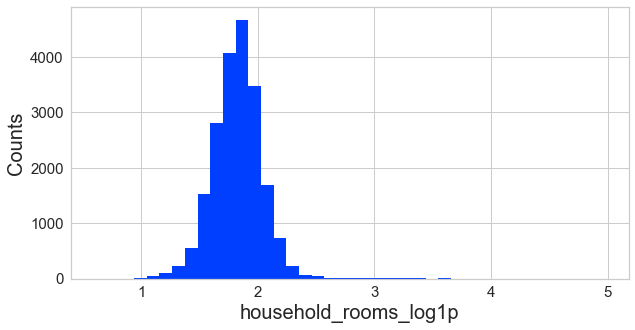

In [9]:
home['household_rooms_log1p'] = log_transformation(home['rooms_per_household'])

#check the distribution using histogram
# set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(home['household_rooms_log1p'], bins=40)
plt.xlabel('household_rooms_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

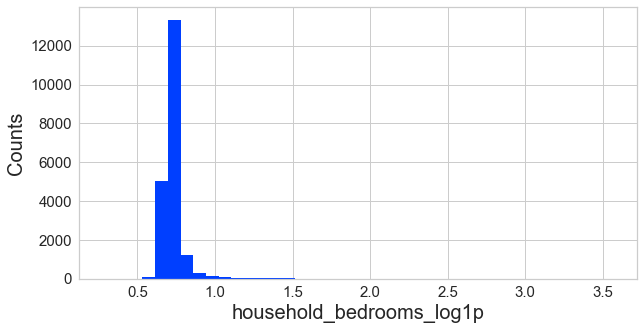

In [10]:
home['household_bedrooms_log1p'] = log_transformation(home['bedrooms_per_household'])

#check the distribution using histogram
# set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(home['household_bedrooms_log1p'], bins=40)
plt.xlabel('household_bedrooms_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

In [11]:
#get the categorical data
cat_features = ['ocean_proximity']
data_cat = home[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0                       0   
1                          0                       0                       0   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                       0                       0   
5                          0                       0                       0   
6                          0                       0                       0   
7                          0                       0                       0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                         1                           0  
1                         1                           0  
2                         1                           0  
3                         1                    

In [12]:
# Drop features that are not useful
home = home.drop('total_rooms', 1)
home = home.drop('total_bedrooms', 1)


print(home.head(5))

   longitude  latitude  housing_median_age  population  households  \
0    -122.23     37.88                41.0       322.0       126.0   
1    -122.22     37.86                21.0      2401.0      1138.0   
2    -122.24     37.85                52.0       496.0       177.0   
3    -122.25     37.85                52.0       558.0       219.0   
4    -122.25     37.85                52.0       565.0       259.0   

   median_income  median_house_value ocean_proximity  rooms_per_household  \
0         8.3252            452600.0        NEAR BAY             6.984127   
1         8.3014            358500.0        NEAR BAY             6.238137   
2         7.2574            352100.0        NEAR BAY             8.288136   
3         5.6431            341300.0        NEAR BAY             5.817352   
4         3.8462            342200.0        NEAR BAY             6.281853   

   bedrooms_per_household  households_log1p  household_rooms_log1p  \
0                1.023810          4.844187   

C:\Users\jjbro\AppData\Local\Temp/ipykernel_19072/1200319006.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  home = home.drop('total_rooms', 1)
C:\Users\jjbro\AppData\Local\Temp/ipykernel_19072/1200319006.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  home = home.drop('total_bedrooms', 1)


In [13]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['longitude', 'latitude', 'housing_median_age', 'population','median_income','households_log1p','household_rooms_log1p','household_bedrooms_log1p']
data_model_X = pd.concat([home[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_X = pd.concat([home[features_model], data_cat_dummies], axis=1)
data_model_y = home['median_house_value']
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set:  14303
No. of samples in validation set: 6130


In [14]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using model
y_preds = regr.predict(X_val)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_val, y_preds))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_val, y_preds))

Coefficients: 
 [-2.79879370e+04 -2.59691883e+04  9.32793579e+02 -1.35029341e+01
  4.45189272e+04  2.75463227e+04 -7.89430162e+04  2.04124463e+05
 -2.20487927e+04 -5.46779132e+04  1.15148078e+05 -2.20531346e+04
 -1.63682373e+04]
Mean squared error: 4842211730.49
Coefficient of determination: 0.62


In [15]:
# Linear Regression Coefficients
pd.DataFrame(regr.coef_, 
             home.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
ocean_proximity,204124.462776
households_log1p,115148.077728
households,44518.927238
median_income,27546.322747
housing_median_age,932.793579
population,-13.502934
household_bedrooms_log1p,-16368.237286
rooms_per_household,-22048.792699
household_rooms_log1p,-22053.134561
latitude,-25969.188270


In [16]:
# Ridge Regression

from sklearn.linear_model import Ridge

# define model
model = Ridge(alpha=1.0)
# fit model
model.fit(X_train, y_train)
# make predictions
preds = model.predict(X_val)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_val, preds))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_val, preds))

Coefficients: 
 [-2.79769052e+04 -2.59741984e+04  9.32223920e+02 -1.34998980e+01
  4.43972394e+04  2.75238796e+04 -7.75506792e+04  2.01143382e+05
 -1.72882887e+04 -5.00375603e+04  9.61850423e+04 -1.72523325e+04
 -1.16068609e+04]
Mean squared error: 4842370574.66
Coefficient of determination: 0.62
